In [40]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from Preprocessing.preprocess import read_data
import pandas as pd
from scipy.signal import savgol_filter

In [41]:
def read_data(path, file_name=''):
    # Get all files in the folder
    files = os.listdir(path)
    # Read all files
    data = []
    for file in files:
        if file.endswith('.txt') and file.startswith(file_name):
            data.append(np.genfromtxt(path + file, delimiter='\t'))
    return data

In [42]:
chicken = pd.read_csv('./Data Lemak/preprocessed/pure fat/chicken/chicken_mean.csv', names=['Wavelength', 'Intensity'])
duck = pd.read_csv('./Data Lemak/preprocessed/pure fat/duck/duck_mean.csv', names=['Wavelength', 'Intensity'])
goat = pd.read_csv('./Data Lemak/preprocessed/pure fat/goat/goat_mean.csv', names=['Wavelength', 'Intensity'])
cow = pd.read_csv('./Data Lemak/preprocessed/pure fat/cow/cow_mean.csv', names=['Wavelength', 'Intensity'])
pig = pd.read_csv('./Data Lemak/preprocessed/pure fat/pig/pig_mean.csv', names=['Wavelength', 'Intensity'])
pig_chicken_25_75 = pd.read_csv('./Data Lemak/preprocessed/contamination/pig-chicken/pig-chicken 25-75/pig_chicken_25_75_mean.csv', names=['Wavelength', 'Intensity'])
pig_chicken_50_50 = pd.read_csv('./Data Lemak/preprocessed/contamination/pig-chicken/pig-chicken 50-50/pig_chicken_50_50_mean.csv', names=['Wavelength', 'Intensity'])
pig_chicken_75_25 = pd.read_csv('./Data Lemak/preprocessed/contamination/pig-chicken/pig-chicken 75-25/pig_chicken_75_25_mean.csv', names=['Wavelength', 'Intensity'])

In [43]:
scaler = MinMaxScaler()
chicken['Intensity'] = scaler.fit_transform(chicken['Intensity'].values.reshape(-1, 1))
cow['Intensity'] = scaler.fit_transform(cow['Intensity'].values.reshape(-1, 1))
duck['Intensity'] = scaler.fit_transform(duck['Intensity'].values.reshape(-1, 1))
goat['Intensity'] = scaler.fit_transform(goat['Intensity'].values.reshape(-1, 1))
pig['Intensity'] = scaler.fit_transform(pig['Intensity'].values.reshape(-1, 1))
pig_chicken_25_75['Intensity'] = scaler.fit_transform(pig_chicken_25_75['Intensity'].values.reshape(-1, 1))
pig_chicken_50_50['Intensity'] = scaler.fit_transform(pig_chicken_50_50['Intensity'].values.reshape(-1, 1))
pig_chicken_75_25['Intensity'] = scaler.fit_transform(pig_chicken_75_25['Intensity'].values.reshape(-1, 1))

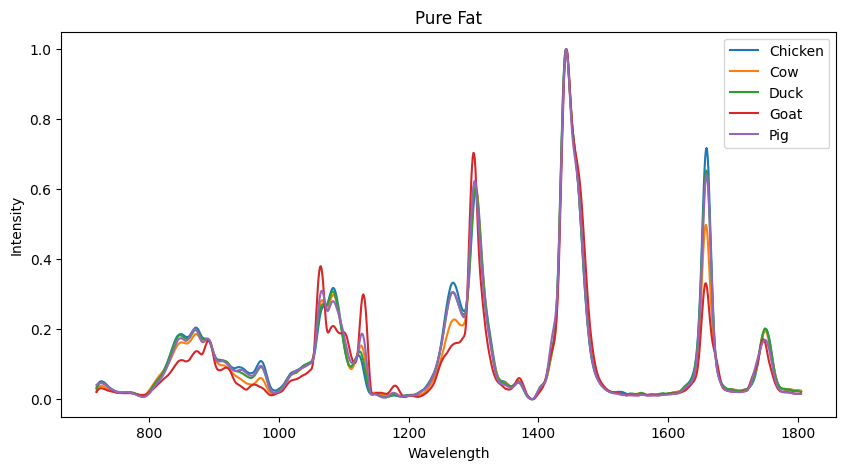

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(chicken['Wavelength'], chicken['Intensity'], label='Chicken')
plt.plot(cow['Wavelength'], cow['Intensity'], label='Cow')
plt.plot(duck['Wavelength'], duck['Intensity'], label='Duck')
plt.plot(goat['Wavelength'], goat['Intensity'], label='Goat')
plt.plot(pig['Wavelength'], pig['Intensity'], label='Pig')
plt.legend()
plt.title('Pure Fat')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.show()

In [45]:
chicken['d2_intensity'] = savgol_filter(chicken['Intensity'].values, 6, 3, 2)
cow['d2_intensity'] = savgol_filter(cow['Intensity'].values, 6, 3, 2)
duck['d2_intensity'] = savgol_filter(duck['Intensity'].values, 6, 3, 2)
goat['d2_intensity'] = savgol_filter(goat['Intensity'].values, 6, 3, 2)
pig['d2_intensity'] = savgol_filter(pig['Intensity'].values, 6, 3, 2)

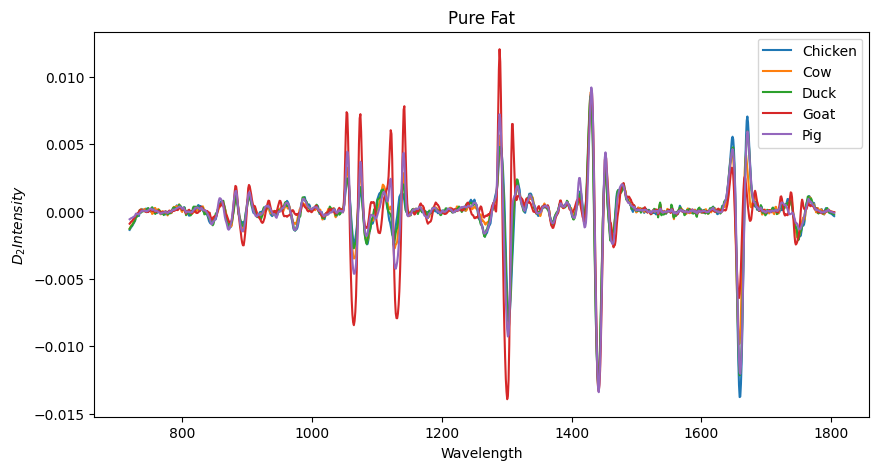

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(chicken['Wavelength'], chicken['d2_intensity'], label='Chicken')
plt.plot(cow['Wavelength'], cow['d2_intensity'], label='Cow')
plt.plot(duck['Wavelength'], duck['d2_intensity'], label='Duck')
plt.plot(goat['Wavelength'], goat['d2_intensity'], label='Goat')
plt.plot(pig['Wavelength'], pig['d2_intensity'], label='Pig')
plt.legend()
plt.title('Pure Fat')
plt.xlabel('Wavelength')
plt.ylabel('$D_2 Intensity$')
plt.show()

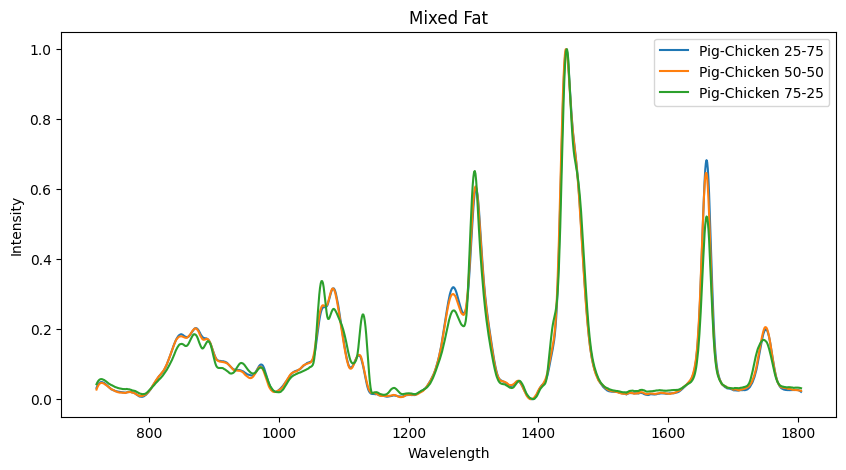

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(pig_chicken_25_75['Wavelength'], pig_chicken_25_75['Intensity'], label='Pig-Chicken 25-75')
plt.plot(pig_chicken_50_50['Wavelength'], pig_chicken_50_50['Intensity'], label='Pig-Chicken 50-50')
plt.plot(pig_chicken_75_25['Wavelength'], pig_chicken_75_25['Intensity'], label='Pig-Chicken 75-25')
plt.legend()
plt.title('Mixed Fat')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.show()